# Task 1: Data Collection and Preparation

In [1]:
import pandas as pd
import ast
import numpy as np

## Charging Sessions Dataset

Read in the data as a dataframe. Interpret the date columns as dates.

In [2]:
Charging_set = pd.read_csv('charging_sessions.csv', parse_dates=['connectionTime','disconnectTime','doneChargingTime'])
print('Columns: ', Charging_set.columns)
print('Number of rows: ', Charging_set.shape[0])

Columns:  Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs'],
      dtype='object')
Number of rows:  66450


In [3]:
Charging_set.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


Define functions to analyze the columns.

In [4]:
def missingValues(columnName, dataSet) :
    if (dataSet[columnName].isnull().any()):
        percentage = round(dataSet[columnName].isnull().sum()/Charging_set.shape[0]*100, 2)
        print('The column contains', dataSet[columnName].isnull().sum(), 'missing values. This corresponds to', percentage, '%.')
    else:
        print('The column does not contain missing values.')

def valueRange(columnName, dataSet) :
    print('Min. value: ', dataSet[columnName].min(), '\nMax. value: ', dataSet[columnName].max())

def dataTypes(columnName, dataSet):
    print('Occuring data types: ', dataSet[columnName].apply(type).unique())

### deleted Column: unnamed

In [5]:
dataTypes('Unnamed: 0', Charging_set)
valueRange('Unnamed: 0', Charging_set)
missingValues('Unnamed: 0', Charging_set)

Occuring data types:  [<class 'int'>]
Min. value:  0 
Max. value:  15291
The column does not contain missing values.


This column does not provide any information that we can use. Therefore it can be deleted.

In [6]:
Charging_set = Charging_set.drop(['Unnamed: 0'], axis=1)

### Column: id - unique identifier of the session record

In [7]:
dataTypes('id', Charging_set)
valueRange('id', Charging_set)
missingValues('id', Charging_set)

Occuring data types:  [<class 'str'>]
Min. value:  5bc90cb9f9af8b0d7fe77cd2 
Max. value:  6155053bf9af8b76960e16d1
The column does not contain missing values.


### Column: connectionTime - time when the EV plugged in

In [8]:
dataTypes('connectionTime', Charging_set)
valueRange('connectionTime', Charging_set)
missingValues('connectionTime', Charging_set)

Occuring data types:  [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
Min. value:  2018-04-25 11:08:04+00:00 
Max. value:  2021-09-14 05:43:39+00:00
The column does not contain missing values.


### Column: disconnectTime - time when the EV unplugged

In [9]:
dataTypes('disconnectTime', Charging_set)
valueRange('disconnectTime', Charging_set)
missingValues('disconnectTime', Charging_set)

Occuring data types:  [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
Min. value:  2018-04-25 13:20:10+00:00 
Max. value:  2021-09-14 14:46:28+00:00
The column does not contain missing values.


### new Column: totalConnectionTime - total time the EV was plugged in

In [10]:
Charging_set['totalConnectionTime'] = Charging_set['disconnectTime'] - Charging_set['connectionTime']
dataTypes('totalConnectionTime', Charging_set)
valueRange('totalConnectionTime', Charging_set)
missingValues('totalConnectionTime', Charging_set)

Occuring data types:  [<class 'pandas._libs.tslibs.timedeltas.Timedelta'>]
Min. value:  0 days 00:02:04 
Max. value:  10 days 05:16:09
The column does not contain missing values.


### Column: doneChargingTime - time of the last non-zero current draw recorded

In [11]:
dataTypes('doneChargingTime', Charging_set)
valueRange('doneChargingTime', Charging_set)
missingValues('doneChargingTime', Charging_set)
# Charging_set[Charging_set['kWhDelivered'] == 0] #-> not because of no kWh delivered 
# Charging_set[Charging_set['userInputs'].isnull() & Charging_set['doneChargingTime'].isnull()] #-> not because of the userInput

Occuring data types:  [<class 'pandas._libs.tslibs.timestamps.Timestamp'>
 <class 'pandas._libs.tslibs.nattype.NaTType'>]
Min. value:  2018-04-25 13:21:10+00:00 
Max. value:  2021-09-14 14:46:22+00:00
The column contains 4088 missing values. This corresponds to 6.15 %.


In [12]:
print('In these', Charging_set[Charging_set['doneChargingTime'] < Charging_set['connectionTime']].shape[0], 'columns the doneChargingTime is earlier than the connectionTime.')
Charging_set[Charging_set['doneChargingTime'] < Charging_set['connectionTime']]
# Charging_set[(Charging_set['doneChargingTime'] < Charging_set['connectionTime']) & Charging_set['userInputs'].isnull()] #-> not because of the userInput

In these 27 columns the doneChargingTime is earlier than the connectionTime.


,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,totalConnectionTime
22219,5c942ca4f9af8b06b04b3bb4,2019-03-05 19:13:55+00:00,2019-03-05 22:50:39+00:00,2019-03-05 19:12:56+00:00,0.706655,2_39_78_367_2019-03-05 19:13:55.113078,2,CA-494,2-39-78-367,America/Los_Angeles,NaN,NaN,0 days 03:36:44
22253,5c957e1cf9af8b42f440af03,2019-03-06 20:26:30+00:00,2019-03-07 01:48:54+00:00,2019-03-06 20:25:34+00:00,1.046381,2_39_78_367_2019-03-06 20:26:30.479644,2,CA-494,2-39-78-367,America/Los_Angeles,NaN,NaN,0 days 05:22:24
23562,5cca3a22f9af8b49aaa4cba0,2019-04-15 20:24:13+00:00,2019-04-15 23:39:04+00:00,2019-04-15 20:23:14+00:00,0.635278,2_39_78_367_2019-04-15 20:24:13.365605,2,CA-494,2-39-78-367,America/Los_Angeles,1154.0,"[{'WhPerMile': 308, 'kWhRequested': 9.24, 'mil...",0 days 03:14:51
23586,5ccb8ba6f9af8b4d9721df00,2019-04-16 16:11:08+00:00,2019-04-16 19:10:48+00:00,2019-04-16 16:10:11+00:00,0.585977,2_39_78_367_2019-04-16 16:11:07.939710,2,CA-494,2-39-78-367,America/Los_Angeles,1154.0,"[{'WhPerMile': 308, 'kWhRequested': 6.16, 'mil...",0 days 02:59:40
27689,5d856f1ff9af8b0c7bdf245c,2019-09-04 16:35:04+00:00,2019-09-05 00:44:27+00:00,2019-09-04 16:34:05+00:00,1.584500,2_39_78_367_2019-09-04 16:35:04.129327,2,CA-494,2-39-78-367,America/Los_Angeles,NaN,NaN,0 days 08:09:23
27740,5d86c0a5f9af8b1022a81870,2019-09-05 18:44:57+00:00,2019-09-06 00:55:19+00:00,2019-09-05 18:43:57+00:00,1.067230,2_39_78_360_2019-09-05 18:44:57.410168,2,CA-322,2-39-78-360,America/Los_Angeles,NaN,NaN,0 days 06:10:22
29295,5dcdffbdf9af8b220a19be8b,2019-10-29 17:22:32+00:00,2019-10-31 01:57:20+00:00,2019-10-29 17:21:33+00:00,6.316210,2_39_78_367_2019-10-29 17:22:32.086306,2,CA-494,2-39-78-367,America/Los_Angeles,1470.0,"[{'WhPerMile': 292, 'kWhRequested': 14.6, 'mil...",1 days 08:34:48
31285,5bc91740f9af8b0dc677b860,2018-05-04 19:08:37+00:00,2018-05-04 22:07:47+00:00,2018-05-04 19:07:40+00:00,0.551722,2_39_78_363_2018-05-04 19:08:36.642114,2,CA-320,2-39-78-363,America/Los_Angeles,NaN,NaN,0 days 02:59:10
31287,5bc91740f9af8b0dc677b862,2018-05-04 19:23:52+00:00,2018-05-05 00:04:15+00:00,2018-05-04 19:22:52+00:00,0.912297,2_39_78_367_2018-05-04 19:23:51.897392,2,CA-494,2-39-78-367,America/Los_Angeles,NaN,NaN,0 days 04:40:23
31403,5bc917d0f9af8b0dc677b8d6,2018-05-07 20:47:51+00:00,2018-05-08 02:16:00+00:00,2018-05-07 20:47:50+00:00,14.967000,2_39_139_567_2018-05-07 20:47:50.862655,2,CA-513,2-39-139-567,America/Los_Angeles,NaN,NaN,0 days 05:28:09


Since doneChargingTime cannot be earier than the connectionTime, we delete these values. Later, these values will be estimated.

In [13]:
Charging_set.loc[Charging_set['doneChargingTime'] < Charging_set['connectionTime'], 'doneChargingTime'] = np.nan
# print('In these', Charging_set[Charging_set['doneChargingTime'] < Charging_set['connectionTime']].shape[0], 'columns the doneChargingTime is earlier than the connectionTime.')

We estimate the missing values by adding the average charging time per kWh * the kWh that were delivered to the connectionTime.

In [14]:
TotalChargingTime = Charging_set['doneChargingTime'] - Charging_set['connectionTime']
AverageTimePerKwh = (TotalChargingTime/Charging_set['kWhDelivered']).mean()
# print(pd.to_datetime('2019-03-05 19:13:55+00:00')+AverageTimePerKwh*0.706655)
Charging_set['doneChargingTime'] = Charging_set['doneChargingTime'].fillna(value=Charging_set['connectionTime']+AverageTimePerKwh*Charging_set['kWhDelivered']).dt.round('1s')
dataTypes('doneChargingTime', Charging_set)
valueRange('doneChargingTime', Charging_set)
missingValues('doneChargingTime', Charging_set)

Occuring data types:  [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
Min. value:  2018-04-25 13:21:10+00:00 
Max. value:  2021-09-15 00:49:17+00:00
The column does not contain missing values.


### new Column: totalChargingTime - total time the EV was charging

In [15]:
Charging_set['totalChargingTime'] = Charging_set['doneChargingTime'] - Charging_set['connectionTime']
dataTypes('totalChargingTime', Charging_set)
valueRange('totalChargingTime', Charging_set)
missingValues('totalChargingTime', Charging_set)

Occuring data types:  [<class 'pandas._libs.tslibs.timedeltas.Timedelta'>]
Min. value:  0 days 00:00:00 
Max. value:  8 days 08:00:57
The column does not contain missing values.


### Column: kWhDelivered - amount of energy delivered during the session

In [16]:
dataTypes('kWhDelivered', Charging_set)
valueRange('kWhDelivered', Charging_set)
missingValues('kWhDelivered', Charging_set)

Occuring data types:  [<class 'float'>]
Min. value:  0.501 
Max. value:  108.79724166666666
The column does not contain missing values.


### Column: sessionID - unique identifier for the session

In [17]:
dataTypes('sessionID', Charging_set)
valueRange('sessionID', Charging_set)
missingValues('sessionID', Charging_set)

Occuring data types:  [<class 'str'>]
Min. value:  1_1_178_817_2018-09-13 15:24:32.185314 
Max. value:  2_39_95_444_2021-07-14 16:54:32.800222
The column does not contain missing values.


Where ist the difference to the column id?

### Column: siteID - unique identifier for the site

In [18]:
dataTypes('siteID', Charging_set)
valueRange('siteID', Charging_set)
missingValues('siteID', Charging_set)

Occuring data types:  [<class 'int'>]
Min. value:  1 
Max. value:  2
The column does not contain missing values.


### Column: spaceID - unique identifier for the parking space

In [19]:
dataTypes('spaceID', Charging_set)
valueRange('spaceID', Charging_set)
missingValues('spaceID', Charging_set)

Occuring data types:  [<class 'str'>]
Min. value:  11900388 
Max. value:  CA-513
The column does not contain missing values.


You can see that the spaceIDs are structured differently (CA..., AG..., numbers)

### Column: stationID - unique identifier for the EVSE

In [20]:
dataTypes('stationID', Charging_set)
valueRange('stationID', Charging_set)
missingValues('stationID', Charging_set)

Occuring data types:  [<class 'str'>]
Min. value:  1-1-178-817 
Max. value:  2-39-95-444
The column does not contain missing values.


### deleted Column: timezone - timezone of the site, based on pytz format

In [21]:
dataTypes('timezone', Charging_set)
valueRange('timezone', Charging_set)
missingValues('timezone', Charging_set)
print( 'Occuring values: ', Charging_set['timezone'].unique())

Occuring data types:  [<class 'str'>]
Min. value:  America/Los_Angeles 
Max. value:  America/Los_Angeles
The column does not contain missing values.
Occuring values:  ['America/Los_Angeles']


The column 'timezone' only contains identical values. Therefore, it can be deleted.

In [22]:
Charging_set = Charging_set.drop(['timezone'], axis=1)

### new Column: userInformation - indication whether user information is given

In [23]:
Charging_set['userInformation'] = Charging_set['userID'].notnull() | Charging_set['userInputs'].notnull()

The new column indicates whether userID or userInputs is available. Dataset with user information: Charging_set[Charging_set['userInformation']]

### Column: userID - unique identifier of the user, if provided

In [24]:
dataTypes('userID', Charging_set)
valueRange('userID', Charging_set)
missingValues('userID', Charging_set)
if Charging_set['userID'].isnull().sum() == Charging_set['userID'].isna().sum() :
    print('All missing values are NaN values.')

Occuring data types:  [<class 'float'>]
Min. value:  1.0 
Max. value:  19923.0
The column contains 17263 missing values. This corresponds to 25.98 %.
All missing values are NaN values.


### Column: userInputs - inputs provided by the user

In [25]:
dataTypes('userInputs', Charging_set)
missingValues('userInputs', Charging_set)
if Charging_set['userInputs'].isnull().sum() == Charging_set['userInputs'].isna().sum() :
    print('All missing values are NaN values.')
Charging_set.at[3, 'userInputs']

Occuring data types:  [<class 'str'> <class 'float'>]
The column contains 17263 missing values. This corresponds to 25.98 %.
All missing values are NaN values.


"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:19 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}]"

Since the values of a string cannot be processed well, we convert them into lists containing Pandas Series.

In [26]:
def toPandasSeries (input):
    if isinstance(input, str) :
        input = ast.literal_eval(input)
        result = []
        for entry in input :
            result.append(pd.Series(entry))
        return result
    else :
        return np.nan

Charging_set['userInputs'] = Charging_set['userInputs'].apply(toPandasSeries)
print(Charging_set.at[3, 'userInputs'])

[WhPerMile                                       400
kWhRequested                                    8.0
milesRequested                                   20
minutesAvailable                                 65
modifiedAt            Thu, 02 Jan 2020 14:00:03 GMT
paymentRequired                                True
requestedDeparture    Thu, 02 Jan 2020 15:04:58 GMT
userID                                         1117
dtype: object, WhPerMile                                       400
kWhRequested                                    8.0
milesRequested                                   20
minutesAvailable                                 65
modifiedAt            Thu, 02 Jan 2020 14:00:19 GMT
paymentRequired                                True
requestedDeparture    Thu, 02 Jan 2020 15:04:58 GMT
userID                                         1117
dtype: object]


### Dataset description

In [27]:
Charging_set.info()
Charging_set
Charging_set.to_csv('charging_sessions_preprocessed.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   66450 non-null  object             
 1   connectionTime       66450 non-null  datetime64[ns, UTC]
 2   disconnectTime       66450 non-null  datetime64[ns, UTC]
 3   doneChargingTime     66450 non-null  datetime64[ns, UTC]
 4   kWhDelivered         66450 non-null  float64            
 5   sessionID            66450 non-null  object             
 6   siteID               66450 non-null  int64              
 7   spaceID              66450 non-null  object             
 8   stationID            66450 non-null  object             
 9   userID               49187 non-null  float64            
 10  userInputs           49187 non-null  object             
 11  totalConnectionTime  66450 non-null  timedelta64[ns]    
 12  totalChargingTime 

## Weather Burbank Airport Dataset

Read in the data as a dataframe. Interpret the date columns as dates.

In [28]:
Weather_set = pd.read_csv('weather_burbank_airport.csv', parse_dates=['timestamp'])
print('Columns: ', Weather_set.columns)
print('Number of rows: ', Weather_set.shape[0])

Columns:  Index(['city', 'timestamp', 'temperature', 'cloud_cover',
       'cloud_cover_description', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature'],
      dtype='object')
Number of rows:  29244


### deleted Column: city

In [29]:
dataTypes('city', Weather_set)
valueRange('city', Weather_set)
missingValues('city', Weather_set)
print( 'Occuring values: ', Weather_set['city'].unique())

Occuring data types:  [<class 'str'>]
Min. value:  Burbank 
Max. value:  Burbank
The column does not contain missing values.
Occuring values:  ['Burbank']


The column 'city' only contains identical values. Therefore, it can be deleted.

In [30]:
Weather_set = Weather_set.drop(['city'], axis=1)

### Column: timestamp

In [31]:
dataTypes('timestamp', Weather_set)
valueRange('timestamp', Weather_set)
missingValues('timestamp', Weather_set)
if Weather_set['timestamp'].is_monotonic_increasing :
    print('The rows are ordered by increasing time.')
print('Number of rows in the Charging Sessions Dataset with values after 2021-01-01 07:53:00: ', len(Charging_set[Charging_set['connectionTime'] > '2021-01-01 07:53:00']))
print('Occuring time intervals: ', Weather_set['timestamp'].diff().unique())

Occuring data types:  [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
Min. value:  2018-01-01 08:53:00 
Max. value:  2021-01-01 07:53:00
The column does not contain missing values.
The rows are ordered by increasing time.
Number of rows in the Charging Sessions Dataset with values after 2021-01-01 07:53:00:  8910
Occuring time intervals:  <TimedeltaArray>
[              NaT, '0 days 01:00:00', '0 days 00:43:00', '0 days 00:05:00',
 '0 days 00:12:00', '0 days 00:37:00', '0 days 00:23:00', '0 days 00:31:00',
 '0 days 00:17:00', '0 days 00:04:00', '0 days 00:11:00', '0 days 00:28:00',
 '0 days 00:41:00', '0 days 00:19:00', '0 days 00:39:00', '0 days 00:21:00',
 '0 days 00:38:00', '0 days 00:20:00', '0 days 00:02:00', '0 days 00:08:00',
 '0 days 00:15:00', '0 days 00:24:00', '0 days 00:14:00', '0 days 00:46:00',
 '0 days 00:36:00', '0 days 00:10:00', '0 days 00:09:00', '0 days 00:51:00',
 '0 days 00:48:00', '0 days 00:03:00', '0 days 00:30:00', '0 days 00:16:00',
 '0 days 00:42:00', '

The Charging Session Dataset contains data between 2018-04-25 11:08:04+00:00 and 2021-09-14 14:46:28+00:00.

The Weather Burbank Airport Dataset contains data between 2018-01-01 08:53:00 and 2021-01-01 07:53:00.

Problem: this is not the same time span!

### Column: temperature

In [32]:
dataTypes('temperature', Weather_set)
valueRange('temperature', Weather_set)
missingValues('temperature', Weather_set)

Occuring data types:  [<class 'float'>]
Min. value:  2.0 
Max. value:  46.0
The column contains 25 missing values. This corresponds to 0.04 %.


In order not to lose rows with missing values, we replace these. As the data ist sorted by time and therefore the true values are close to the surrounding values, we perform a forward fill for the missing values.

In [33]:
Weather_set['temperature'] = Weather_set['temperature'].ffill()
missingValues('temperature', Weather_set)

The column does not contain missing values.


### Column: cloud_cover

In [34]:
dataTypes('cloud_cover', Weather_set)
valueRange('cloud_cover', Weather_set)
missingValues('cloud_cover', Weather_set)

Occuring data types:  [<class 'float'>]
Min. value:  4.0 
Max. value:  47.0
The column contains 20 missing values. This corresponds to 0.03 %.


In order not to lose rows with missing values, we replace these. As the data ist sorted by time and therefore the true values are close to the surrounding values, we perform a forward fill for the missing values.

In [35]:
Weather_set['cloud_cover'] = Weather_set['cloud_cover'].ffill()
missingValues('cloud_cover', Weather_set)

The column does not contain missing values.


### Column: cloud_cover_description

In [36]:
dataTypes('cloud_cover_description', Weather_set)
missingValues('cloud_cover_description', Weather_set)

Occuring data types:  [<class 'str'> <class 'float'>]
The column contains 20 missing values. This corresponds to 0.03 %.


In order not to lose rows with missing values, we replace these. As the data ist sorted by time and therefore the true values are close to the surrounding values, we perform a forward fill for the missing values.

In [37]:
Weather_set['cloud_cover_description'] = Weather_set['cloud_cover_description'].ffill()
missingValues('cloud_cover_description', Weather_set)

The column does not contain missing values.


In [38]:
Weather_set["cloud_cover_description"].value_counts()

cloud_cover_description
Fair                       17140
Cloudy                      4937
Partly Cloudy               2668
Mostly Cloudy               1831
Light Rain                   896
Haze                         579
Smoke                        329
Fog                          325
Rain                         247
Heavy Rain                   120
Fair / Windy                  74
T-Storm                       18
Thunder in the Vicinity       17
Partly Cloudy / Windy         14
Light Rain / Windy            10
Mostly Cloudy / Windy         10
Cloudy / Windy                 9
Heavy Rain / Windy             7
Blowing Dust                   5
Heavy T-Storm                  4
Rain / Windy                   2
Thunder                        1
Light Rain with Thunder        1
Name: count, dtype: int64

It could be useful to group the classes.

### Column: pressure

In [39]:
dataTypes('pressure', Weather_set)
valueRange('pressure', Weather_set)
missingValues('pressure', Weather_set)

Occuring data types:  [<class 'float'>]
Min. value:  971.0 
Max. value:  999.65
The column contains 8 missing values. This corresponds to 0.01 %.


In order not to lose rows with missing values, we replace these. As the data ist sorted by time and therefore the true values are close to the surrounding values, we perform a forward fill for the missing values.

In [40]:
Weather_set['pressure'] = Weather_set['pressure'].ffill()
missingValues('pressure', Weather_set)

The column does not contain missing values.


### Column: windspeed

In [41]:
dataTypes('windspeed', Weather_set)
valueRange('windspeed', Weather_set)
missingValues('windspeed', Weather_set)

Occuring data types:  [<class 'float'>]
Min. value:  0.0 
Max. value:  57.0
The column contains 86 missing values. This corresponds to 0.13 %.


In order not to lose rows with missing values, we replace these. As the data ist sorted by time and therefore the true values are close to the surrounding values, we perform a forward fill for the missing values.

In [42]:
Weather_set['windspeed'] = Weather_set['windspeed'].ffill()
missingValues('windspeed', Weather_set)

The column does not contain missing values.


### Column: precipitation

In [43]:
dataTypes('precipitation', Weather_set)
valueRange('precipitation', Weather_set)
missingValues('precipitation', Weather_set)

Occuring data types:  [<class 'float'>]
Min. value:  0.0 
Max. value:  18.54
The column does not contain missing values.


### Column: felt_temperature

In [44]:
dataTypes('felt_temperature', Weather_set)
valueRange('felt_temperature', Weather_set)
missingValues('felt_temperature', Weather_set)

Occuring data types:  [<class 'float'>]
Min. value:  0.0 
Max. value:  42.0
The column contains 26 missing values. This corresponds to 0.04 %.


In order not to lose rows with missing values, we replace these. As the data ist sorted by time and therefore the true values are close to the surrounding values, we perform a forward fill for the missing values.

In [45]:
Weather_set['felt_temperature'] = Weather_set['felt_temperature'].ffill()
missingValues('felt_temperature', Weather_set)

The column does not contain missing values.


### Dataset description

In [46]:
Weather_set.info()
Weather_set
Weather_set.to_csv('weather_burbank_airport_preprocessed.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                29244 non-null  datetime64[ns]
 1   temperature              29244 non-null  float64       
 2   cloud_cover              29244 non-null  float64       
 3   cloud_cover_description  29244 non-null  object        
 4   pressure                 29244 non-null  float64       
 5   windspeed                29244 non-null  float64       
 6   precipitation            29244 non-null  float64       
 7   felt_temperature         29244 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.8+ MB


In [47]:
Charging_set.describe()

,kWhDelivered,siteID,userID,totalConnectionTime,totalChargingTime
count,66450.000000,66450.000000,49187.000000,66450,66450
mean,11.787916,1.472656,1800.494582,0 days 06:17:34.578209179,0 days 03:45:43.122919488
std,10.314789,0.499256,2617.548614,0 days 04:51:41.391314114,0 days 03:25:17.286723493
min,0.501000,1.000000,1.000000,0 days 00:02:04,0 days 00:00:00
25%,5.097000,1.000000,431.000000,0 days 02:51:57.750000,0 days 01:40:29
50%,9.140000,1.000000,818.000000,0 days 06:11:44,0 days 02:53:50
75%,14.183000,2.000000,1805.000000,0 days 09:13:31.500000,0 days 04:57:02.250000
max,108.797242,2.000000,19923.000000,10 days 05:16:09,8 days 08:00:57


In [48]:
Charging_set.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,userInputs,totalConnectionTime,totalChargingTime,userInformation
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,"[[250, 25.0, 100, 463, Thu, 02 Jan 2020 13:09:...",0 days 06:02:21,0 days 04:22:41,True
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,"[[280, 70.0, 250, 595, Thu, 02 Jan 2020 13:37:...",0 days 09:01:31,0 days 06:41:15,True
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,"[[400, 8.0, 20, 60, Thu, 02 Jan 2020 13:57:17 ...",0 days 10:42:47,0 days 02:38:31,True
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,1117.0,"[[400, 8.0, 20, 65, Thu, 02 Jan 2020 14:00:03 ...",0 days 02:38:41,0 days 01:18:47,True
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,334.0,"[[400, 16.0, 40, 504, Thu, 02 Jan 2020 14:00:1...",0 days 08:08:39,0 days 04:17:29,True


In [49]:
## calculate the total potential time each station could be utilized by subtracting the minimal timestamp from the maximum timestamp of each station.

# Convert 'time' to datetime
Charging_set['connectionTime'] = pd.to_datetime(Charging_set['connectionTime'])
Charging_set['disconnectTime'] = pd.to_datetime(Charging_set['disconnectTime'])

# Extract the minimum and maximum timestamps
Charging_set['min_timestamp_per_station'] = Charging_set.groupby('stationID')['connectionTime'].transform('min')
Charging_set['max_timestamp_per_station'] = Charging_set.groupby('stationID')['disconnectTime'].transform('max')

#calculate total potential time each station could be used
Charging_set['total_time_potential_usage_per_station'] = (Charging_set['max_timestamp_per_station'] - Charging_set['min_timestamp_per_station']).dt.total_seconds()

# Drop intermediate columns if not needed
Charging_set = Charging_set.drop(['min_timestamp_per_station', 'max_timestamp_per_station'], axis=1)

print(Charging_set[['stationID', 'total_time_potential_usage_per_station']].drop_duplicates())

total_time_df = Charging_set[['stationID', 'total_time_potential_usage_per_station']].drop_duplicates()

total_time_df.to_csv('total_time_df.csv', index=False)


          stationID  total_time_potential_usage_per_station
0       1-1-179-810                              95384200.0
1       1-1-193-825                              94919887.0
2       1-1-193-829                              94717743.0
3       1-1-193-820                              94731812.0
4       1-1-193-819                              94898789.0
...             ...                                     ...
21348  2-39-131-565                              50016207.0
21686   2-39-82-384                              82609117.0
22775  2-39-125-559                              91344566.0
24152   2-39-82-385                              85454833.0
46086  2-39-81-4550                              25846124.0

[107 rows x 2 columns]


In [50]:
## Calculate the actual time each station is utelized

total_time_spend_per_station = Charging_set.groupby('stationID')['totalConnectionTime'].sum()
print(total_time_spend_per_station)

stationID
1-1-178-817   285 days 23:47:21
1-1-178-823   358 days 23:11:06
1-1-178-824   266 days 22:46:38
1-1-178-828   315 days 23:51:32
1-1-179-777   191 days 08:34:33
                     ...       
2-39-91-441   117 days 18:44:31
2-39-92-436   149 days 15:21:39
2-39-92-442   146 days 14:52:06
2-39-95-27    212 days 05:31:35
2-39-95-444   107 days 14:13:16
Name: totalConnectionTime, Length: 107, dtype: timedelta64[ns]


In [51]:
Charging_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype              
---  ------                                  --------------  -----              
 0   id                                      66450 non-null  object             
 1   connectionTime                          66450 non-null  datetime64[ns, UTC]
 2   disconnectTime                          66450 non-null  datetime64[ns, UTC]
 3   doneChargingTime                        66450 non-null  datetime64[ns, UTC]
 4   kWhDelivered                            66450 non-null  float64            
 5   sessionID                               66450 non-null  object             
 6   siteID                                  66450 non-null  int64              
 7   spaceID                                 66450 non-null  object             
 8   stationID                               66450 non-null  object             


In [52]:
Charging_set['occupyingStation'] = (Charging_set['totalConnectionTime'] - Charging_set['totalChargingTime']).dt.total_seconds().astype('float64')
Charging_set['totalChargingTimeNumber'] = Charging_set['totalChargingTime'].dt.total_seconds().astype('float64')
Charging_set['totalConnectionTimeNumber'] = Charging_set['totalConnectionTime'].dt.total_seconds().astype('float64')
Charging_set.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,userInputs,totalConnectionTime,totalChargingTime,userInformation,total_time_potential_usage_per_station,occupyingStation,totalChargingTimeNumber,totalConnectionTimeNumber
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,"[[250, 25.0, 100, 463, Thu, 02 Jan 2020 13:09:...",0 days 06:02:21,0 days 04:22:41,True,95384200.0,5980.0,15761.0,21741.0
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,"[[280, 70.0, 250, 595, Thu, 02 Jan 2020 13:37:...",0 days 09:01:31,0 days 06:41:15,True,94919887.0,8416.0,24075.0,32491.0
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,"[[400, 8.0, 20, 60, Thu, 02 Jan 2020 13:57:17 ...",0 days 10:42:47,0 days 02:38:31,True,94717743.0,29056.0,9511.0,38567.0
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,1117.0,"[[400, 8.0, 20, 65, Thu, 02 Jan 2020 14:00:03 ...",0 days 02:38:41,0 days 01:18:47,True,94731812.0,4794.0,4727.0,9521.0
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,334.0,"[[400, 16.0, 40, 504, Thu, 02 Jan 2020 14:00:1...",0 days 08:08:39,0 days 04:17:29,True,94898789.0,13870.0,15449.0,29319.0


In [53]:
# Calculate the times needed
Charging_set['total_time_spend_per_station_connected'] = Charging_set.groupby('stationID')['totalConnectionTimeNumber'].transform('sum')
Charging_set['total_time_spend_per_station_charged'] = Charging_set.groupby('stationID')['totalChargingTimeNumber'].transform('sum')


Charging_set_Utilization = (Charging_set[['siteID','stationID', 'total_time_potential_usage_per_station', 'total_time_spend_per_station_connected', 'total_time_spend_per_station_charged']].drop_duplicates())
Charging_set_Utilization.head()

,siteID,stationID,total_time_potential_usage_per_station,total_time_spend_per_station_connected,total_time_spend_per_station_charged
0,1,1-1-179-810,95384200.0,16376796.0,10545940.0
1,1,1-1-193-825,94919887.0,22526512.0,14757166.0
2,1,1-1-193-829,94717743.0,21508359.0,14021398.0
3,1,1-1-193-820,94731812.0,24930716.0,14406728.0
4,1,1-1-193-819,94898789.0,26779844.0,15879716.0


In [54]:
# calculate the utilization rates per station
Charging_set_Utilization['station_utilization_connection_rate'] = (Charging_set_Utilization['total_time_spend_per_station_connected'] / Charging_set_Utilization['total_time_potential_usage_per_station'])
Charging_set_Utilization['station_utilization_charging_rate'] = (Charging_set_Utilization['total_time_spend_per_station_charged'] / Charging_set_Utilization['total_time_potential_usage_per_station'])
Charging_set_Utilization['station_utilization_charging_if_connected_rate'] = (Charging_set_Utilization['total_time_spend_per_station_charged'] / Charging_set_Utilization['total_time_spend_per_station_connected'])
Charging_set_Utilization.head()

,siteID,stationID,total_time_potential_usage_per_station,total_time_spend_per_station_connected,total_time_spend_per_station_charged,station_utilization_connection_rate,station_utilization_charging_rate,station_utilization_charging_if_connected_rate
0,1,1-1-179-810,95384200.0,16376796.0,10545940.0,0.171693,0.110563,0.643956
1,1,1-1-193-825,94919887.0,22526512.0,14757166.0,0.237321,0.155470,0.655102
2,1,1-1-193-829,94717743.0,21508359.0,14021398.0,0.227078,0.148033,0.651905
3,1,1-1-193-820,94731812.0,24930716.0,14406728.0,0.263172,0.152079,0.577871
4,1,1-1-193-819,94898789.0,26779844.0,15879716.0,0.282194,0.167333,0.592973


In [55]:
Charging_set_Utilization.to_csv('charging_sessions_utilization.csv', index=False)

In [56]:
# calculate the utilization rate of each site by summing up the TOTAL times and then calculating the rate.
Charging_set_Utilization['total_time_potential_usage_per_site'] = Charging_set.groupby('siteID')['total_time_potential_usage_per_station'].transform('sum')
Charging_set_Utilization['total_time_connected_usage_per_site'] = Charging_set.groupby('siteID')['total_time_spend_per_station_connected'].transform('sum')
Charging_set_Utilization['total_time_charged_usage_per_site'] = Charging_set.groupby('siteID')['total_time_spend_per_station_charged'].transform('sum')

Charging_set_Utilization['site_utilization_connection_rate'] = Charging_set_Utilization['total_time_connected_usage_per_site'] - Charging_set_Utilization['total_time_potential_usage_per_site']
Charging_set_Utilization['site_utilization_charging_rate'] = Charging_set_Utilization['total_time_charged_usage_per_site'] - Charging_set_Utilization['total_time_potential_usage_per_site']
Charging_set_Utilization['site_utilization_charging_if_connected_rate'] = Charging_set_Utilization['total_time_charged_usage_per_site'] - Charging_set_Utilization['total_time_connected_usage_per_site']

Charging_set_Utilization.head()

,siteID,stationID,total_time_potential_usage_per_station,total_time_spend_per_station_connected,total_time_spend_per_station_charged,station_utilization_connection_rate,station_utilization_charging_rate,station_utilization_charging_if_connected_rate,total_time_potential_usage_per_site,total_time_connected_usage_per_site,total_time_charged_usage_per_site,site_utilization_connection_rate,site_utilization_charging_rate,site_utilization_charging_if_connected_rate
0,1,1-1-179-810,95384200.0,16376796.0,10545940.0,0.171693,0.110563,0.643956,3.327240e+12,6.568157e+11,4.006143e+11,-2.670424e+12,-2.926626e+12,-2.562015e+11
1,1,1-1-193-825,94919887.0,22526512.0,14757166.0,0.237321,0.155470,0.655102,3.327240e+12,6.568157e+11,4.006143e+11,-2.670424e+12,-2.926626e+12,-2.562015e+11
2,1,1-1-193-829,94717743.0,21508359.0,14021398.0,0.227078,0.148033,0.651905,3.327240e+12,6.568157e+11,4.006143e+11,-2.670424e+12,-2.926626e+12,-2.562015e+11
3,1,1-1-193-820,94731812.0,24930716.0,14406728.0,0.263172,0.152079,0.577871,3.327240e+12,6.568157e+11,4.006143e+11,-2.670424e+12,-2.926626e+12,-2.562015e+11
4,1,1-1-193-819,94898789.0,26779844.0,15879716.0,0.282194,0.167333,0.592973,3.327240e+12,6.568157e+11,4.006143e+11,-2.670424e+12,-2.926626e+12,-2.562015e+11


### Visualizing Utilization Rate

In [57]:
# visualize the mean utilization rate of the stations grouped by each site to evaluate the utilization rate per site.
mean_connection_utilization_by_site = Charging_set_Utilization.groupby('siteID')['station_utilization_connection_rate'].mean()
print(mean_connection_utilization_by_site)
mean_charging_utilization_by_site = Charging_set_Utilization.groupby('siteID')['station_utilization_charging_rate'].mean()
print(mean_charging_utilization_by_site)
mean_charging_if_conncted_utilization_by_site = Charging_set_Utilization.groupby('siteID')['station_utilization_charging_if_connected_rate'].mean()
print(mean_charging_if_conncted_utilization_by_site)

siteID
1    0.175432
2    0.117336
Name: station_utilization_connection_rate, dtype: float64
siteID
1    0.106656
2    0.091288
Name: station_utilization_charging_rate, dtype: float64
siteID
1    0.605677
2    0.767667
Name: station_utilization_charging_if_connected_rate, dtype: float64


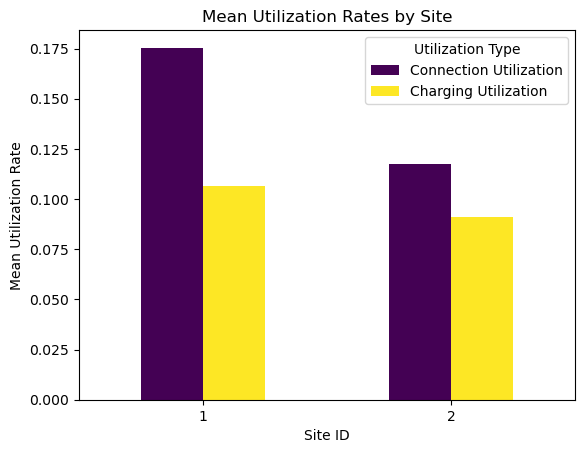

In [58]:
import matplotlib.pyplot as plt
means_df = pd.DataFrame({
    'Connection Utilization': mean_connection_utilization_by_site,
    'Charging Utilization': mean_charging_utilization_by_site,
})
means_df.plot(kind='bar', rot=0, colormap='viridis')
plt.xlabel('Site ID')
plt.ylabel('Mean Utilization Rate')
plt.title('Mean Utilization Rates by Site')
plt.legend(title='Utilization Type')
plt.show()


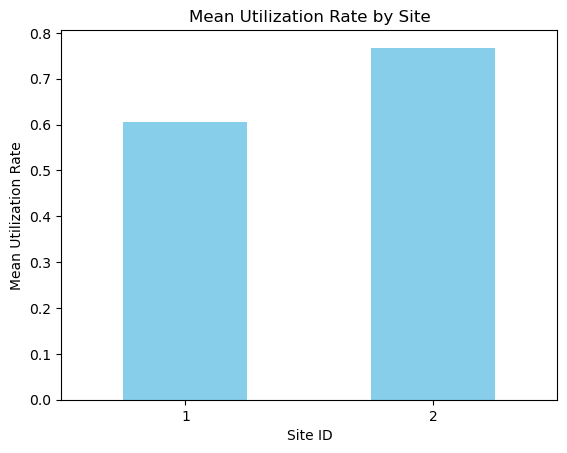

In [59]:
mean_charging_if_conncted_utilization_by_site.plot(kind='bar', rot=0, color='skyblue')
plt.xlabel('Site ID')
plt.ylabel('Mean Utilization Rate')
plt.title('Mean Utilization Rate by Site')
plt.show()

## Hier kann noch die Mean utilization rate in anderer Art errechnet werden. Es wird nicht der mean aller stations genommen sondern die einzelnen Utilization zeiten zusammengerechnet und direkt eine Rate berechnet. So haben stations nicht alle die selbe Gewichtung, sondern nach der gesamten Nutzung